#IMPORTS

In [ ]:
import scipy.integrate as spi
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib.pyplot import figure
import os
import datetime
import matplotlib.dates as mdates

#LOAD DATA

In [ ]:
M = 16

my_data = np.genfromtxt('France-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

N = aM + aF
N = N[0 : M]

my_data = np.genfromtxt('france.txt', delimiter='', skip_header=10)
day, cases, deaths = my_data[:,0], my_data[:,3], my_data[:,2]
print(day, cases)

[ 37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148.
 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162.
 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176.
 177. 178. 179. 180. 181. 182.] [   86.   116.   176.   196.   269.   404.   632.   921.  1178.  1370.
  1739.  2221.  2803.  3570.  4396.  5284.  6473.  6953.  8268.  9328.
 10575. 12310. 13144. 16796. 17923. 20002. 22511. 25269. 29561. 30366.
 33599. 39161. 42022. 41290. 43823. 45607. 46

In [ ]:
my_data = pd.read_excel('MUestimates_home_1.xlsx', sheet_name='France',index_col=None)
CH = np.array(my_data)

my_data = pd.read_excel('MUestimates_work_1.xlsx', sheet_name='France',index_col=None)
CW = np.array(my_data)

my_data = pd.read_excel('MUestimates_school_1.xlsx', sheet_name='France',index_col=None)
CS = np.array(my_data)

my_data = pd.read_excel('MUestimates_other_locations_1.xlsx', sheet_name='France',index_col=None)
CO = np.array(my_data)

my_data = pd.read_excel('MUestimates_all_locations_1.xlsx', sheet_name='France',index_col=None)
CA = np.array(my_data)

#C = CH + CW + CS + CO

#CONSTANTS

In [ ]:
mu      = np.full(M, 0.01)
#mu      = np.array((0., 0., 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.003, 0.003, 0.007, 0.007, 0.02, 0.02, 0.05, 0.05))
#k = 0.2
#mu      = k * np.array((0., 0., 0., 0., 0.001, 0.001, 0.002, 0.004, 0.006, 0.008, 0.015, 0.023, 0.053, 0.084, 0.155, 0.227))
a       = 1/2
beta    = 0.03293229938889798
delta   = lambda t: (1 - a) * np.full(M, 1/5.2)
#delta2  = lambda t: (1 - a) * np.full(M, 1/5.2) if t < 52 else (1 - a) * np.concatenate((np.full(4, 1/8), np.full(4, 1/5), np.full(8, 1/8)))
gamma   = lambda t: np.full(M, 1/14)
#gamma2  = lambda t: np.full(M, 1/14) if t < 52 else np.concatenate((np.full(4, 1/6), np.full(4, 1/9), np.full(8, 1/6)))
epsilon = a * 1/15
TS      = 1/10
S0      = N
I0      = np.zeros(M);                  I0[0:16] = cases[0] / 16
Q0      = np.zeros(M);                  Q0[0:16] = cases[0] / 16
R0      = np.zeros(M)
F0      = np.zeros(M)
y0      = np.concatenate((S0, I0, Q0, R0, F0))

day0 = datetime.datetime(2020, 2, 24)
first_day = int(day[0])
last_day  = 300
t         = np.arange(first_day, last_day + TS, TS)
datename  = lambda n: str(day0 + datetime.timedelta(days=int(n)))[:10]
datename_ = lambda n, tick: str(datename(n))[:10]

def C(t):
    if t < 51:
        return CH + CW + CS + CO
    elif t < 53:
        return 1.0*CH + 0.75*CW + 0.75*CO + 0.5*CS
    elif t < 61:
        return 1.0*CH + 0.6*CW + 0.6*CO + 0.0*CS
    elif t < 72:
        return 1.0*CH + 0.2*CW + 0.2*CO + 0.0*CS
    elif t < 120:
        return 1.0*CH + 0.05*CW + 0.05*CO + 0.0*CS
    else:
        return 1.0*CH + 0.1*CW + 0.1*CO + 0.0*CS

def C2(t):
    if t < 51:
        return CH + CW + CS + CO
    elif t < 53:
        return 1.0*CH + 0.75*CW + 0.75*CO + 0.5*CS
    elif t < 61:
        return 1.0*CH + 0.6*CW + 0.6*CO + 0.0*CS
    elif t < 72:
        return 1.0*CH + 0.2*CW + 0.2*CO + 0.0*CS
    elif t < 150:
        return 1.0*CH + 0.05*CW + 0.05*CO + 0.0*CS
    else:
        return 1.0*CH + 0.1*CW + 0.1*CO + 0.0*CS     

#INTEGRATION

In [ ]:
def diff_eqs(y, t, beta_, delta_, gamma_, epsilon_, mu_, C_):
    S, I, Q, R, F = y[0:M], y[M:2*M], y[2*M:3*M], y[3*M:4*M], y[4*M:5*M]
    N = S + I + Q + R
    dSdt, dIdt, dQdt, dRdt, dFdt = np.empty(M), np.empty(M), np.empty(M), np.empty(M), np.empty(M)
    for i in range(M):
        Pi = 0.0
        for j in range(M):
            Pi += C_(t)[i,j] * I[j] / (N[j] - Q[j])
        dSdt[i] = -beta_ * Pi * S[i]
        dIdt[i] = (beta_ * Pi * S[i]) - (delta_(t)[i] + epsilon_) * I[i]
        dQdt[i] = delta_(t)[i] * I[i] - (gamma_(t)[i] + mu_[i]) * Q[i]
        dRdt[i] = gamma_(t)[i] * Q[i] + epsilon_ * I[i] 
        dFdt[i] = mu_[i] * Q[i]
    return np.concatenate((dSdt, dIdt, dQdt, dRdt, dFdt))  

y = spi.odeint(diff_eqs, y0, t, args=(beta, delta, gamma, epsilon, mu, C))
Si, Ii, Qi, Ri, Fi = y[:, 0:M], y[:, M:2*M], y[:, 2*M:3*M], y[:, 3*M:4*M], y[:, 4*M:5*M]
S, I, Q, R, F = np.sum(Si, axis=1), np.sum(Ii, axis=1), np.sum(Qi, axis=1), np.sum(Ri, axis=1), np.sum(Fi, axis=1)
total = S + I + Q + R + F
print(S[-1], I[-1], Q[-1], R[-1], F[-1])
peak = np.max(I + Q)
peakdate = t[(I + Q) == peak]
print('Peak Infection : ', peak, peakdate, datename(peakdate))
peakQ = np.max(Q)
peakQdate = t[Q == peakQ]
print('Peak Quarantine : ', peakQ, peakQdate, datename(peakQdate))

y2 = spi.odeint(diff_eqs, y0, t, args=(beta, delta, gamma, epsilon, mu, C2))
Si2, Ii2, Qi2, Ri2, Fi2 = y2[:, 0:M], y2[:, M:2*M], y2[:, 2*M:3*M], y2[:, 3*M:4*M], y2[:, 4*M:5*M]
S2, I2, Q2, R2, F2 = np.sum(Si2, axis=1), np.sum(Ii2, axis=1), np.sum(Qi2, axis=1), np.sum(Ri2, axis=1), np.sum(Fi2, axis=1)
total2 = S2 + I2 + Q2 + R2 + F2
print(S2[-1], I2[-1], Q2[-1], R2[-1], F2[-1])
peak = np.max(I2 + Q2)
peakdate = t[(I2 + Q2) == peak]
print('Peak Infection : ', peak, peakdate, datename(peakdate))
peakQ = np.max(Q2)
peakQdate = t[Q2 == peakQ]
print('Peak Quarantine : ', peakQ, peakQdate, datename(peakQdate))

59009660.195488535 94336.4251518443 107891.06854530709 1729888.4232509646 169833.8875633621
Peak Infection :  202227.4936971514 [300.] 2020-12-20
Peak Quarantine :  107891.06854530709 [300.] 2020-12-20
59475733.74106526 70261.29614982015 79465.49301338248 1353132.0294551244 133017.4403164191
Peak Infection :  149726.78916320263 [300.] 2020-12-20
Peak Quarantine :  79465.49301338248 [300.] 2020-12-20


#PLOTTING

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1280x320 with 0 Axes>

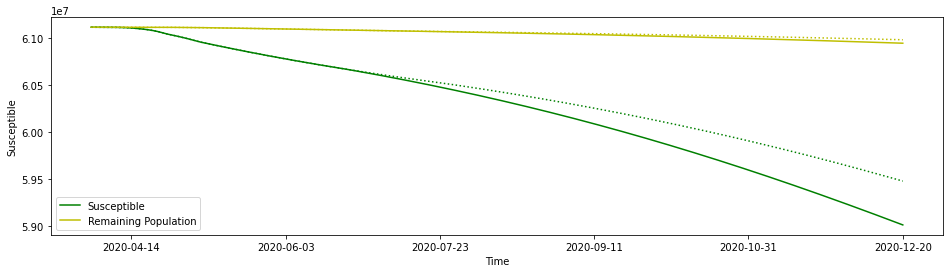

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1280x320 with 0 Axes>

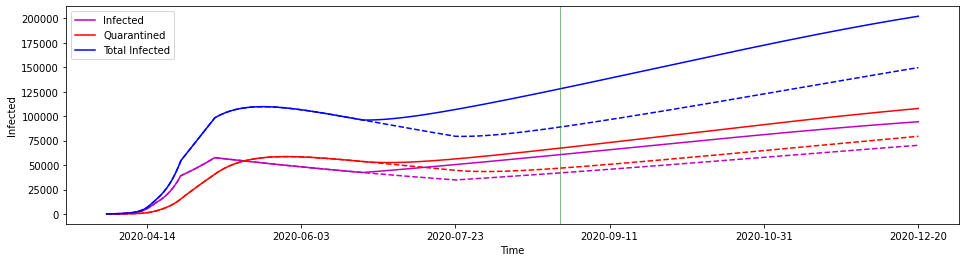

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x320 with 0 Axes>

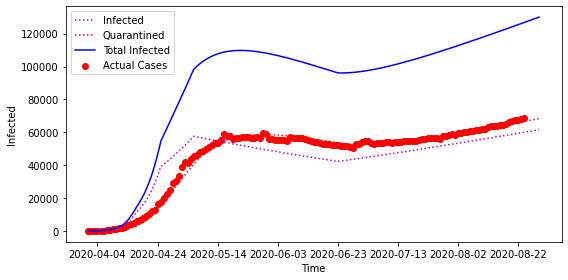

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x320 with 0 Axes>

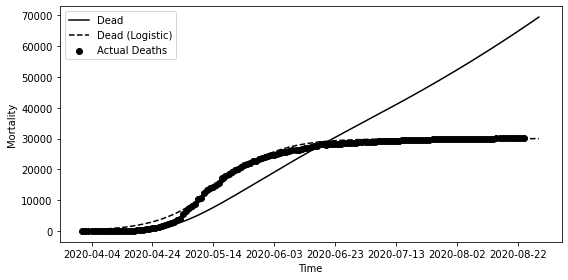

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 480x640 with 0 Axes>

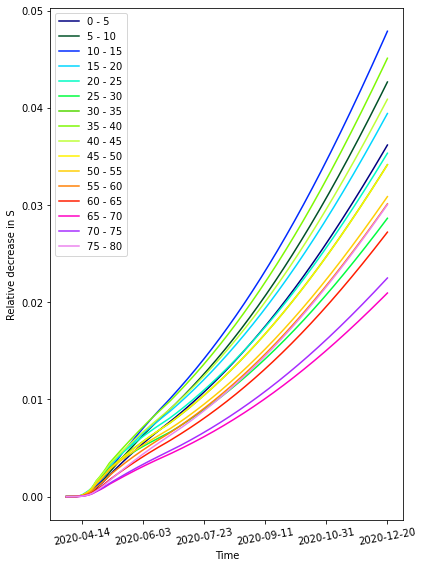

In [ ]:
if not os.path.exists('eps'):
    os.mkdir('eps')

figure(num=1, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pl.subplots(figsize=(16, 4))
pl.plot(t, S, '-g', label='Susceptible')
pl.plot(t, S + I + Q + R, '-y', label='Remaining Population')
pl.plot(t, S2, ':g', label='')
pl.plot(t, S2 + I2 + Q2 + R2, ':y', label='')
ax.xaxis.set_major_formatter(pl.FuncFormatter(datename_))
pl.xticks(rotation=0)
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Susceptible')
pl.savefig('eps/fr-susceptible.eps', format='eps')
pl.show()

figure(num=2, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pl.subplots(figsize=(16, 4))
pl.plot(t, I, '-m', label='Infected')
pl.plot(t, I2, '--m', label='')
pl.plot(t, Q, '-r', label='Quarantined')
pl.plot(t, Q2, '--r', label='')
pl.plot(t, I + Q, '-b', label='Total Infected')
pl.plot(t, I2 + Q2, '--b', label='')
#pl.plot(t, F, ':k', label='Dead')
ax.axvline(x=184, color='g', linewidth=.5)
ax.xaxis.set_major_formatter(pl.FuncFormatter(datename_))
pl.xticks(rotation=0)
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.savefig('eps/fr-infected.eps', format='eps')
pl.show()

figure(num=3, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pl.subplots(figsize=(8, 4))
pl.plot(t[int(0/TS):int(150/TS)], I[int(0/TS):int(150/TS)], ':m', label='Infected')
pl.plot(t[int(0/TS):int(150/TS)], Q[int(0/TS):int(150/TS)], ':r', label='Quarantined')
pl.plot(t[int(0/TS):int(150/TS)], I[int(0/TS):int(150/TS)] + Q[int(0/TS):int(150/TS)], '-b', label='Total Infected')
pl.scatter(day, cases, c='r', label='Actual Cases')
pl.legend(loc=0)
ax.xaxis.set_major_formatter(pl.FuncFormatter(datename_))
pl.xticks(rotation=0)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.tight_layout()
pl.savefig('eps/fr-infected-fit.eps', format='eps')
pl.show()

figure(num=4, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pl.subplots(figsize=(8, 4))
#pl.plot(t, R, '-k', label='Recovered')
pl.plot(t[0:int(150/TS)], F[0:int(150/TS)], '-k', label='Dead')
pl.plot(t[0:int(150/TS)], (3e4 / (1 + np.exp(-(t - 82)/10)))[0:int(150/TS)], '--k', label='Dead (Logistic)')
pl.scatter(day, deaths, c='k', label='Actual Deaths')
ax.xaxis.set_major_formatter(pl.FuncFormatter(datename_))
pl.xticks(rotation=0)
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Mortality')
pl.tight_layout()
pl.savefig('eps/fr-mortality.eps', format='eps')
pl.show()

#figure(num=5, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
#pl.plot(t, np.sum(Qi[:, 0:4], axis=1), '-r', label='0 - 20')
#pl.plot(t, np.sum(Qi[:, 4:8], axis=1), '-g', label='20 - 40')
#pl.plot(t, np.sum(Qi[:, 8:12], axis=1), '-b', label='40 - 60')
#pl.plot(t, np.sum(Qi[:, 12:16], axis=1), '-k', label='60 - 80')
#pl.plot(t, np.sum(Qi2[:, 0:4], axis=1), '--r', label='0 - 20')
#pl.plot(t, np.sum(Qi2[:, 4:8], axis=1), '--g', label='20 - 40')
#pl.plot(t, np.sum(Qi2[:, 8:12], axis=1), '--b', label='40 - 60')
#pl.plot(t, np.sum(Qi2[:, 12:16], axis=1), '--k', label='60 - 80')
#pl.legend(loc=0)
#pl.xlabel('Time')
#pl.ylabel('Quarantined')
#pl.show()

figure(num=6, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pl.subplots(figsize=(6, 8))
#Xi = np.cumsum((Ii + Qi), axis=0)
#pl.plot(t[int(50/TS):], (np.sum(Fi[:, 0:4], axis=1) / np.sum(Ni[:, 0:4], axis=1))[int(50/TS):], '-r', label='0 - 20')
#pl.plot(t[int(50/TS):], (np.sum(Fi[:, 4:8], axis=1) / np.sum(Ni[:, 4:8], axis=1))[int(50/TS):], '-g', label='20 - 40')
#pl.plot(t[int(50/TS):], (np.sum(Fi[:, 8:12], axis=1) / np.sum(Ni[:, 8:12], axis=1))[int(50/TS):], '-b', label='40 - 60')
#pl.plot(t[int(50/TS):], (np.sum(Fi[:, 12:16], axis=1) / np.sum(Ni[:, 12:16], axis=1))[int(50/TS):], '-k', label='60 - 80')
#pl.plot(t, (np.sum(Si[:, 0:4], axis=1)[0] - np.sum(Si[:, 0:4], axis=1)) / np.sum(Si[:, 0:4], axis=1)[0], '-r', label='0 - 20')
#pl.plot(t, (np.sum(Si[:, 4:8], axis=1)[0] - np.sum(Si[:, 4:8], axis=1)) / np.sum(Si[:, 4:8], axis=1)[0], '-g', label='20 - 40')
#pl.plot(t, (np.sum(Si[:, 8:12], axis=1)[0] - np.sum(Si[:, 8:12], axis=1)) / np.sum(Si[:, 8:12], axis=1)[0], '-b', label='40 - 60')
#pl.plot(t, (np.sum(Si[:, 12:16], axis=1)[0] - np.sum(Si[:, 12:16], axis=1)) / np.sum(Si[:, 12:16], axis=1)[0], '-k', label='60 - 80')

colormap = pl.cm.gist_ncar
pl.gca().set_prop_cycle(color=[colormap(i) for i in np.linspace(0, 0.9, M)])

for i in range(M):
    pl.plot(t, (np.sum(Si[:, i:i + 1], axis=1)[0] - np.sum(Si[:, i:i + 1], axis=1)) / np.sum(Si[:, i:i + 1], axis=1)[0], label=str(i*5) + ' - ' + str((i + 1) * 5))
pl.legend(loc=0)
ax.xaxis.set_major_formatter(pl.FuncFormatter(datename_))
pl.xticks(rotation=10)
pl.xlabel('Time')
#pl.ylabel('Mortality')
pl.ylabel('Relative decrease in S')
pl.tight_layout()
pl.savefig('eps/fr-relative-S.eps', format='eps')
pl.show()

In [ ]:
!zip -r ./eps.zip ./eps/

  adding: eps/ (stored 0%)
  adding: eps/fr-infected-fit.eps (deflated 67%)
  adding: eps/fr-susceptible.eps (deflated 68%)
  adding: eps/fr-infected.eps (deflated 70%)
  adding: eps/fr-mortality.eps (deflated 68%)
  adding: eps/fr-relative-S.eps (deflated 66%)


#OPTIMIZE

In [ ]:
from scipy import optimize

def find_error(b):
    y = spi.odeint(diff_eqs, y0, t, args=(b, delta, gamma, epsilon, mu, C))
    Si, Ii, Qi, Ri, Fi = y[:, 0:M], y[:, M:2*M], y[:, 2*M:3*M], y[:, 3*M:4*M], y[:, 4*M:5*M]
    S, I, Q, R, F = np.sum(Si, axis=1), np.sum(Ii, axis=1), np.sum(Qi, axis=1), np.sum(Ri, axis=1), np.sum(Fi, axis=1)

    error = 0.0
    for i in day:
        d = int((i - first_day) / TS)
        error += ((cases[day == i] - Q[d]) / 100)**2
    return error

In [ ]:
guess = 0.033
sol = optimize.minimize(find_error, guess)
print(sol.x[0])
print(find_error(sol.x[0]))
print(find_error(beta))

0.03293229938889798
[60116.91597088]
[160243.78241573]


#REPRODUCTIVE RATIO

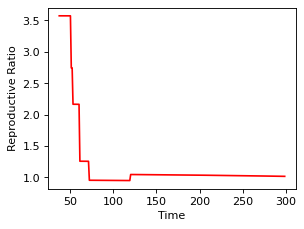

[3.5731581060930004, 3.5731555514781452, 3.573152102044733, 3.573147393235622, 3.5731409170500252, 3.573131965260488, 3.573119550182919, 3.5731022941308686, 3.5730782751803254, 3.5730448119838707, 3.572998163565671, 3.572933110541669, 3.57284237100028, 3.5727157859019827, 2.74360622458933, 2.743479100507899, 2.1657549860984995, 2.1656426469604435, 2.165510828669952, 2.165356447837702, 2.1651759144515466, 2.1649650506061224, 2.1647189962449196, 2.1644320999401057, 1.2586627431919966, 1.2585704702575575, 1.2584718168309135, 1.2583668231716982, 1.2582555107638345, 1.2581378833197234, 1.2580139277065272, 1.2578836147807726, 1.257746900140284, 1.257603724799876, 1.2574540157962812, 1.046950513823838, 1.046840147133858, 1.0467299093190223, 1.0466197419115302, 1.0465095907200035, 1.0463994055063497, 1.046289139684888, 1.046178750045343, 1.046068196496477, 1.0459574418302542, 1.0458464515031887, 1.0457351934346568, 1.0456236378205894, 1.0455117569618406, 1.0453995251045312, 1.0452869182935167,

In [ ]:
def xit(X, i, t):
    return X[int((t - first_day) / TS), i]

def FV(t):
    F = np.zeros((2*M, 2*M))
    V = np.zeros((2*M, 2*M))
    
    Ni = Si + Ii + Qi + Ri
    NNi = np.zeros(M)
    for i in range(M):
        NNi[i] = xit(Ni, i, t)


    for i in range(2*M):
        for j in range(2*M):
            if i < M and j < M and i == j:
                V[i, j] = delta(t)[i] + epsilon
            if (i - M) == j:
                V[i, j] = -1 * delta(t)[i - M]
            if i >= M and j >= M and i == j:
                V[i, j] = gamma(t)[i - M] + mu[i - M]
            if i < M and j < M:
                #F[i, j] = beta * C(t)[i, j] * NNi[i] / NNi[j] 
                F[i, j] = beta * C(t)[i, j] * xit(Si, i, t) / (xit(Si, j, t) + xit(Ii, j, t) + xit(Ri, j, t))
    return F, V

def reproductive_ratio(t):
    F, V = FV(t)
    X = np.matmul(F, np.linalg.inv(V))
    return np.max(np.abs(np.linalg.eigvals(X)))

RR0 = []
TT  = range(first_day, last_day)
#TT = np.arange(17.8, 18.2, TS)
for i in TT:
    RR0.append(reproductive_ratio(i))

figure(num=7, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
pl.plot(TT, RR0, '-r', label='R0')
pl.xlabel('Time')
pl.ylabel('Reproductive Ratio')
pl.savefig('eps/fr-R0.eps', format='eps')
pl.show()

print(sorted(set(RR0))[::-1])
print(RR0[TT.index(38)])
print(RR0[TT.index(83)])
print(RR0[TT.index(160)])